In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2
from scipy.spatial import distance

Using TensorFlow backend.


In [2]:
from keras.layers import Flatten, Dense, Input,concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout
from keras.models import Model
from keras.models import Sequential
import tensorflow as tf

In [3]:
from os import listdir

In [4]:
def vector_feature(img, basemodel):
    img1 = cv2.resize(img, (224, 224))
    feature_vector = basemodel.predict(img1.reshape(1, 224, 224, 3))
    return feature_vector

In [5]:
def cosine_simil(vector1, vector2):
    return 1 - distance.cosine(vector1, vector2)

In [6]:
vgg16 = keras.applications.vgg16.VGG16(include_top=True, weights="imagenet", input_shape=(224, 224, 3), pooling="max")

vgg19 = keras.applications.vgg19.VGG19(include_top=True, weights="imagenet", input_shape=(224, 224, 3), pooling="max")

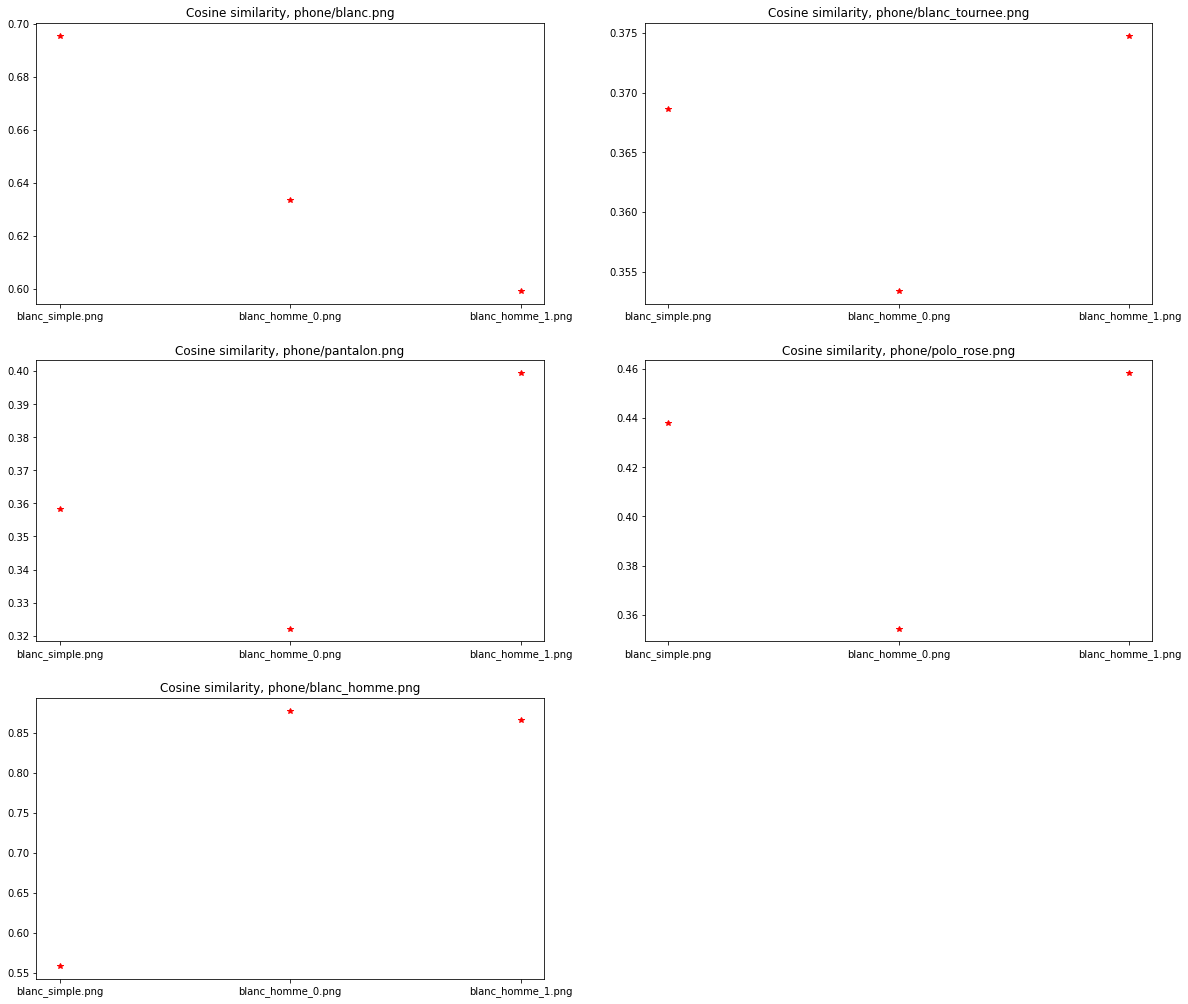

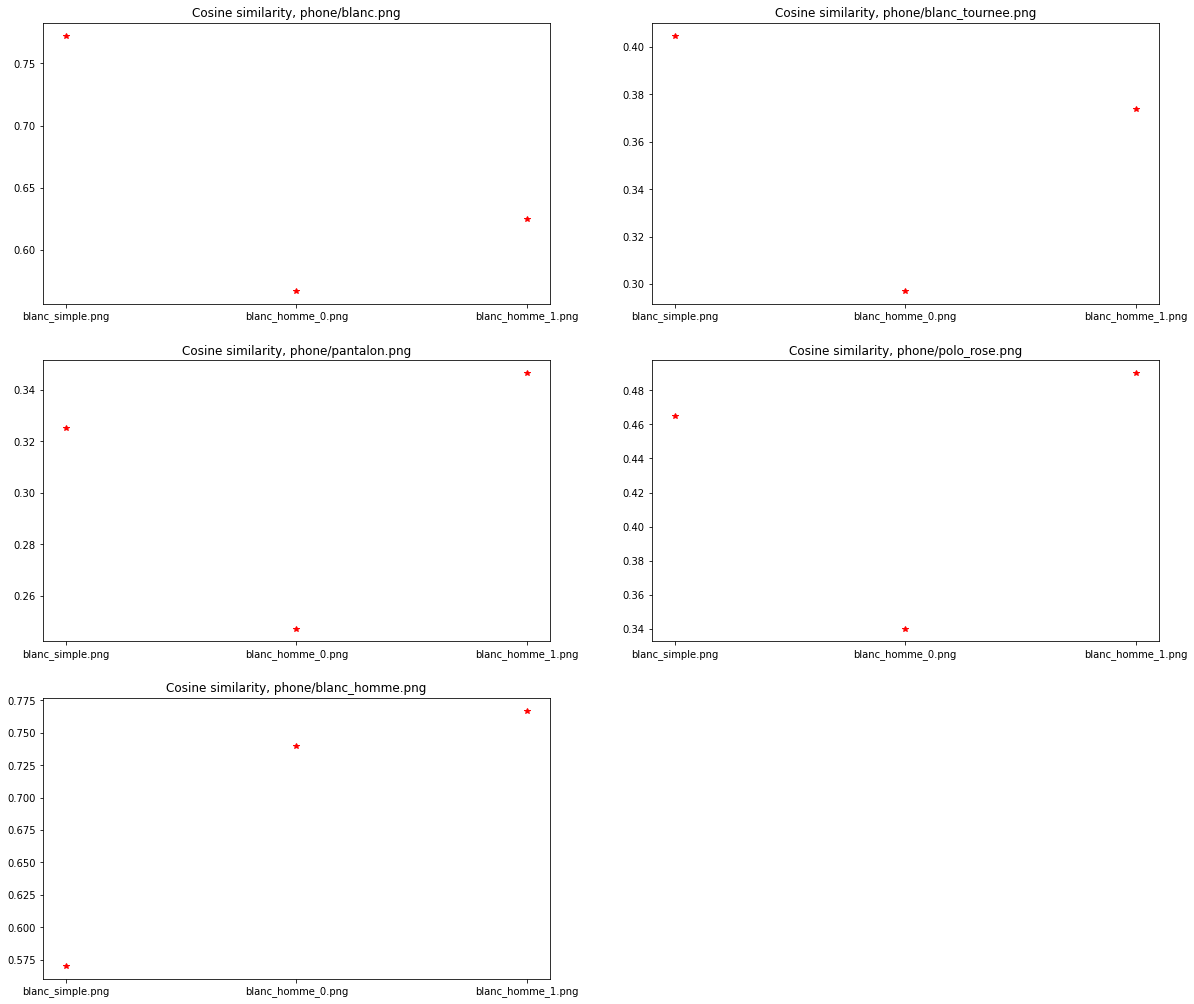

In [7]:
def comparison(img_comparison, bib_val, network, layer, dist):#, network, distance, basemodel):
     
    n = len(img_comparison)
    raw_val = [img for img in listdir(bib_val)]
    pict_val = [cv2.imread(bib_val + "/" +pict) for pict in raw_val]
    basemodel = Model(inputs = network.input, outputs = layer)

    plt.figure(figsize = (20,30))
    for i in range(n):
        img_comp = cv2.imread(img_comparison[i])
        vect_ini = vector_feature(img_comp, basemodel)
        Y_dist = []
        for j in pict_val:
            vect_comp = vector_feature(j, basemodel)
            Y_dist.append(dist(vect_comp, vect_ini))
        plt.subplot(n, 2, i+1)
        plt.plot(raw_val, Y_dist, "r*")
        plt.title("Cosine similarity, " + str(img_comparison[i]))
    plt.show()


#vgg16
 
comparison(["phone/blanc.png", "phone/blanc_tournee.png", "phone/pantalon.png", "phone/polo_rose.png", "phone/blanc_homme.png"], "blanc_jumia", vgg16, vgg16.get_layer("fc2").output, cosine_simil)

#vgg19

comparison(["phone/blanc.png", "phone/blanc_tournee.png", "phone/pantalon.png", "phone/polo_rose.png", "phone/blanc_homme.png"], "blanc_jumia", vgg19, vgg19.get_layer("fc2").output, cosine_simil)